### Importing and structuring the data

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(0)

#set my path
local_path = '/Users/pegaheizad/Desktop/Ghosh_lab/data_files'
# Load the data from an Excel file
T1 = pd.read_excel(f'{local_path}/cd73_ML_data.xlsx')

# Define the columns for the different categories
# Metadata: Cols 1, 2, 5, 6, 7, 8, 9, 10, 25, 73, 138-144
# Geometric: Cols 3, 4, 11-24; Zernike Moments: Cols 28-57
# Intensity: Cols 58-72; Radial Distribution: Cols 75-85
# Texture: Cols 86-137
# Exclude Metadata, keep others
# T2 = pd.concat([T1.iloc[:, 2:4], T1.iloc[:, 10:24], T1.iloc[:, 25:72], T1.iloc[:, 73:137]], axis=1)
T2 = pd.concat([T1.iloc[:, 2:4], T1.iloc[:, 10:24], T1.iloc[:, 25:72], T1.iloc[:, 73:137]], axis=1)

# Convert the table to a NumPy array
T = T2.to_numpy()



### Setting the parameters for the ML

In [23]:
# Define the number of samples for each class
M = 3500
N = 3000

# Create label vector: 1 for Class 1, 0 for Class 2
t = np.concatenate([np.ones(M), np.zeros(N)])

# Explanatory variables: Zernike Moments (assumed to be columns 19-48)
X = T[:, 18:48]

# Ensure the dataset size matches the labels, optional check
assert X.shape[0] == len(t), 'Mismatch between data and label lengths.'

# Define the number of folds for cross-validation
kfold = 10
kf = KFold(n_splits=kfold, shuffle=True, random_state=0)

# Define the number of nodes in the hidden layer
nNodes = 40

# Initialize confusion matrix and lists for predictions
totcon = np.zeros((2, 2))  
totpred = np.array([])     
totytest = np.array([])    
models = []
acc = []


### Training the ML

In [24]:
# Train-test loop
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    xtrain, xtest = X[train_index], X[test_index]
    ytrain, ytest = t[train_index], t[test_index]

    # Convert labels to categorical (for binary classification)
    ytrain_cat = to_categorical(ytrain, 2)
    ytest_cat = to_categorical(ytest, 2)

    # Build the neural network model
    model = Sequential()
    model.add(Dense(nNodes, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dense(2, activation='softmax'))  # 2 output classes

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model (90% train, 10% validation, no test ratio)
    model.fit(xtrain, ytrain_cat, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Store the trained model
    models.append(model)

    # Make predictions on the test set
    pred = model.predict(xtest)
    pred_labels = np.argmax(pred, axis=1)

    # Calculate confusion matrix
    con = confusion_matrix(ytest, pred_labels)
    totcon += con

    # Calculate accuracy for this fold
    acc.append(accuracy_score(ytest, pred_labels) * 100)

    # Store predictions and true labels for confusion matrix plotting
    totpred = np.concatenate([totpred, pred_labels])
    totytest = np.concatenate([totytest, ytest])

# Print the average accuracy over all folds
print(f'Average accuracy over {kfold} folds: {np.mean(acc)}%')

# Optional: save the models and accuracy data
np.save(f'{local_path}/models.npy', models)
np.savetxt(f'{local_path}/accuracy.csv', acc, delimiter=',')

/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
Average accuracy over 10 folds: 81.47692307692307%


### Visualizing the confusion matrix

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


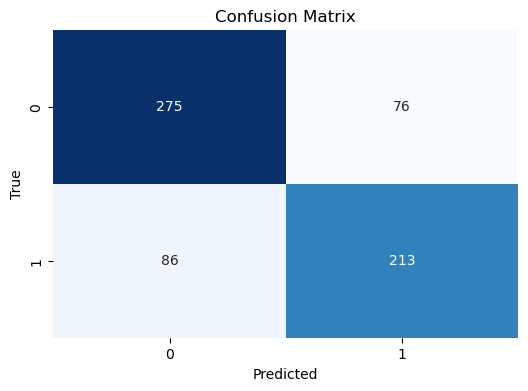

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After generating predictions from the model
y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(ytest, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
